# Problem 11 to 15

[![project euler](https://projecteuler.net/themes/logo_default.png)](https://www.projecteuler.net)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%pip install -q ipywidgets
%pip install -q ipympl
import ipywidgets as widgets
%matplotlib widget

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Problem 11 - Largest Product in a grid

<p>In the $20 \times 20$ grid below, four numbers along a diagonal line have been marked in red.</p>
<p class="monospace center">
08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08<br>
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00<br>
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65<br>
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91<br>
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80<br>
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50<br>
32 98 81 28 64 23 67 10 <span class="red"><b>26</b></span> 38 40 67 59 54 70 66 18 38 64 70<br>
67 26 20 68 02 62 12 20 95 <span class="red"><b>63</b></span> 94 39 63 08 40 91 66 49 94 21<br>
24 55 58 05 66 73 99 26 97 17 <span class="red"><b>78</b></span> 78 96 83 14 88 34 89 63 72<br>
21 36 23 09 75 00 76 44 20 45 35 <span class="red"><b>14</b></span> 00 61 33 97 34 31 33 95<br>
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92<br>
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57<br>
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58<br>
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40<br>
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66<br>
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69<br>
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36<br>
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16<br>
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54<br>
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48<br></p>
<p>The product of these numbers is $26 \times 63 \times 78 \times 14 = 1788696$.</p>
<p>What is the greatest product of four adjacent numbers in the same direction (up, down, left, right, or diagonally) in the $20 \times 20$ grid?</p>

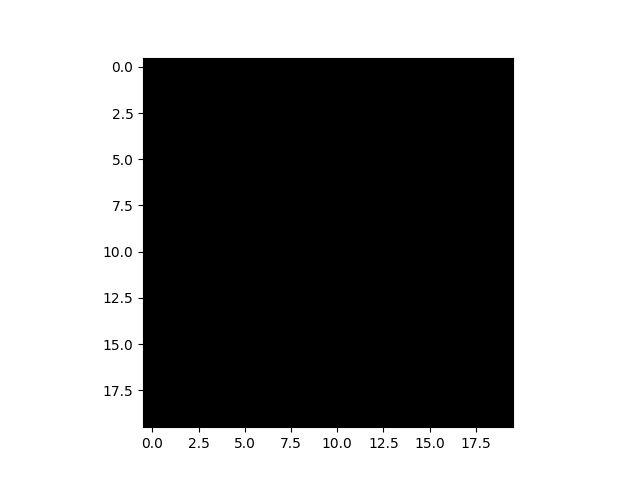

In [2]:
#visualize my stupid grid search:
zeros = np.zeros([20,20], dtype=np.int32)
fig, ax = plt.subplots()
img = ax.imshow(zeros, cmap = "gray")

In [3]:
@widgets.interact
def show_select(x = (0,19,1), y = (0,19,1)):
    ax.set_title(f"{x}, {y}")
    ax.clear()
    new_grid = np.zeros([20,20])
    if y<=16:
        new_grid[y:y+4, x] = 80
    if x<=16:
        new_grid[y, x:x+4] = 135
    if x<=16 and y<= 16:
        new_grid[[y+i for i in range(4)],[x+i for i in range(4)]] = 180
        new_grid[[y+3-i for i in range(4)], [x+i for i in range(4)]] = 230
    img = ax.imshow(new_grid, cmap = "nipy_spectral", vmin = 0, vmax = 255)
    fig.canvas.draw()

interactive(children=(IntSlider(value=9, description='x', max=19), IntSlider(value=9, description='y', max=19)…

In [4]:
grid = "08 02 22 97 38 15 00 40 00 75 04 05 07 78 52 12 50 77 91 08 \
49 49 99 40 17 81 18 57 60 87 17 40 98 43 69 48 04 56 62 00 \
81 49 31 73 55 79 14 29 93 71 40 67 53 88 30 03 49 13 36 65 \
52 70 95 23 04 60 11 42 69 24 68 56 01 32 56 71 37 02 36 91 \
22 31 16 71 51 67 63 89 41 92 36 54 22 40 40 28 66 33 13 80 \
24 47 32 60 99 03 45 02 44 75 33 53 78 36 84 20 35 17 12 50 \
32 98 81 28 64 23 67 10 26 38 40 67 59 54 70 66 18 38 64 70 \
67 26 20 68 02 62 12 20 95 63 94 39 63 08 40 91 66 49 94 21 \
24 55 58 05 66 73 99 26 97 17 78 78 96 83 14 88 34 89 63 72 \
21 36 23 09 75 00 76 44 20 45 35 14 00 61 33 97 34 31 33 95 \
78 17 53 28 22 75 31 67 15 94 03 80 04 62 16 14 09 53 56 92 \
16 39 05 42 96 35 31 47 55 58 88 24 00 17 54 24 36 29 85 57 \
86 56 00 48 35 71 89 07 05 44 44 37 44 60 21 58 51 54 17 58 \
19 80 81 68 05 94 47 69 28 73 92 13 86 52 17 77 04 89 55 40 \
04 52 08 83 97 35 99 16 07 97 57 32 16 26 26 79 33 27 98 66 \
88 36 68 87 57 62 20 72 03 46 33 67 46 55 12 32 63 93 53 69 \
04 42 16 73 38 25 39 11 24 94 72 18 08 46 29 32 40 62 76 36 \
20 69 36 41 72 30 23 88 34 62 99 69 82 67 59 85 74 04 36 16 \
20 73 35 29 78 31 90 01 74 31 49 71 48 86 81 16 23 57 05 54 \
01 70 54 71 83 51 54 69 16 92 33 48 61 43 52 01 89 19 67 48"

grid = grid.split(" ")
grid = np.array(grid).reshape([20,20]).astype(np.int32)
print(f"Grid has shape {grid.shape} and datatype {grid.dtype}")

Grid has shape (20, 20) and datatype int32


In [5]:
largest_product = 0
for x in range(20):
    for y in range(20):
        if y<=16:
            h_prod = np.product(grid[y:y+4, x])
        if x<=16:
            v_prod = np.product(grid[y, x:x+4])
        if x<=16 and y<= 16:
            d_prod1 = np.product(grid[[y+i for i in range(4)],[x+i for i in range(4)]])
            d_prod2 = np.product(grid[[y+3-i for i in range(4)], [x+i for i in range(4)]])
        largest_product = np.max([largest_product, h_prod, v_prod, d_prod1, d_prod2])

In [6]:
print(f"The largest product in the grid is {largest_product}")

The largest product in the grid is 70600674


## Problem 12 - Highly divisive triangular numbers

<p>The sequence of triangle numbers is generated by adding the natural numbers. So the $7$<sup>th</sup> triangle number would be $1 + 2 + 3 + 4 + 5 + 6 + 7 = 28$. The first ten terms would be:
$$1, 3, 6, 10, 15, 21, 28, 36, 45, 55, \dots$$</p>
<p>Let us list the factors of the first seven triangle numbers:</p>
<blockquote class="monospace"><b> 1</b>: 1<br><b> 3</b>: 1,3<br><b> 6</b>: 1,2,3,6<br><b>10</b>: 1,2,5,10<br><b>15</b>: 1,3,5,15<br><b>21</b>: 1,3,7,21<br><b>28</b>: 1,2,4,7,14,28</blockquote>
<p>We can see that $28$ is the first triangle number to have over five divisors.</p>
<p>What is the value of the first triangle number to have over five hundred divisors?</p>


In [7]:
import numba

In [19]:
def prime_factors(n: int):
    factors = []
    denom = 2
    while n!=1 and len(factors) <=500:
        if n%denom==0:
            n//=denom
            factors.append(denom)
        else:
            denom+=1
    return n, factors
@numba.jit()
def calculate_triangular_number():
    for n in np.cumsum(np.arange(1,1e6)):
            factors = []
            denom = 2
            while len(factors) <=500:
                if n%denom==0:
                    n//=denom
                    factors.append(denom)
                else:
                    denom+=1
            print(f"The first triangular number with over 500 divisors is {n}")
            return n
            

/tmp/ipykernel_1062/1116505920.py:11: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()


In [ ]:
calculate_triangular_number()

## Problem 13 - Large Sum

<p>Work out the first ten digits of the sum of the following one-hundred 50-digit numbers.</p>
<div class="monospace center">
37107287533902102798797998220837590246510135740250<br>
46376937677490009712648124896970078050417018260538<br>
74324986199524741059474233309513058123726617309629<br>
91942213363574161572522430563301811072406154908250<br>
23067588207539346171171980310421047513778063246676<br>
89261670696623633820136378418383684178734361726757<br>
28112879812849979408065481931592621691275889832738<br>
44274228917432520321923589422876796487670272189318<br>
47451445736001306439091167216856844588711603153276<br>
70386486105843025439939619828917593665686757934951<br>
62176457141856560629502157223196586755079324193331<br>
64906352462741904929101432445813822663347944758178<br>
92575867718337217661963751590579239728245598838407<br>
58203565325359399008402633568948830189458628227828<br>
80181199384826282014278194139940567587151170094390<br>
35398664372827112653829987240784473053190104293586<br>
86515506006295864861532075273371959191420517255829<br>
71693888707715466499115593487603532921714970056938<br>
54370070576826684624621495650076471787294438377604<br>
53282654108756828443191190634694037855217779295145<br>
36123272525000296071075082563815656710885258350721<br>
45876576172410976447339110607218265236877223636045<br>
17423706905851860660448207621209813287860733969412<br>
81142660418086830619328460811191061556940512689692<br>
51934325451728388641918047049293215058642563049483<br>
62467221648435076201727918039944693004732956340691<br>
15732444386908125794514089057706229429197107928209<br>
55037687525678773091862540744969844508330393682126<br>
18336384825330154686196124348767681297534375946515<br>
80386287592878490201521685554828717201219257766954<br>
78182833757993103614740356856449095527097864797581<br>
16726320100436897842553539920931837441497806860984<br>
48403098129077791799088218795327364475675590848030<br>
87086987551392711854517078544161852424320693150332<br>
59959406895756536782107074926966537676326235447210<br>
69793950679652694742597709739166693763042633987085<br>
41052684708299085211399427365734116182760315001271<br>
65378607361501080857009149939512557028198746004375<br>
35829035317434717326932123578154982629742552737307<br>
94953759765105305946966067683156574377167401875275<br>
88902802571733229619176668713819931811048770190271<br>
25267680276078003013678680992525463401061632866526<br>
36270218540497705585629946580636237993140746255962<br>
24074486908231174977792365466257246923322810917141<br>
91430288197103288597806669760892938638285025333403<br>
34413065578016127815921815005561868836468420090470<br>
23053081172816430487623791969842487255036638784583<br>
11487696932154902810424020138335124462181441773470<br>
63783299490636259666498587618221225225512486764533<br>
67720186971698544312419572409913959008952310058822<br>
95548255300263520781532296796249481641953868218774<br>
76085327132285723110424803456124867697064507995236<br>
37774242535411291684276865538926205024910326572967<br>
23701913275725675285653248258265463092207058596522<br>
29798860272258331913126375147341994889534765745501<br>
18495701454879288984856827726077713721403798879715<br>
38298203783031473527721580348144513491373226651381<br>
34829543829199918180278916522431027392251122869539<br>
40957953066405232632538044100059654939159879593635<br>
29746152185502371307642255121183693803580388584903<br>
41698116222072977186158236678424689157993532961922<br>
62467957194401269043877107275048102390895523597457<br>
23189706772547915061505504953922979530901129967519<br>
86188088225875314529584099251203829009407770775672<br>
11306739708304724483816533873502340845647058077308<br>
82959174767140363198008187129011875491310547126581<br>
97623331044818386269515456334926366572897563400500<br>
42846280183517070527831839425882145521227251250327<br>
55121603546981200581762165212827652751691296897789<br>
32238195734329339946437501907836945765883352399886<br>
75506164965184775180738168837861091527357929701337<br>
62177842752192623401942399639168044983993173312731<br>
32924185707147349566916674687634660915035914677504<br>
99518671430235219628894890102423325116913619626622<br>
73267460800591547471830798392868535206946944540724<br>
76841822524674417161514036427982273348055556214818<br>
97142617910342598647204516893989422179826088076852<br>
87783646182799346313767754307809363333018982642090<br>
10848802521674670883215120185883543223812876952786<br>
71329612474782464538636993009049310363619763878039<br>
62184073572399794223406235393808339651327408011116<br>
66627891981488087797941876876144230030984490851411<br>
60661826293682836764744779239180335110989069790714<br>
85786944089552990653640447425576083659976645795096<br>
66024396409905389607120198219976047599490197230297<br>
64913982680032973156037120041377903785566085089252<br>
16730939319872750275468906903707539413042652315011<br>
94809377245048795150954100921645863754710598436791<br>
78639167021187492431995700641917969777599028300699<br>
15368713711936614952811305876380278410754449733078<br>
40789923115535562561142322423255033685442488917353<br>
44889911501440648020369068063960672322193204149535<br>
41503128880339536053299340368006977710650566631954<br>
81234880673210146739058568557934581403627822703280<br>
82616570773948327592232845941706525094512325230608<br>
22918802058777319719839450180888072429661980811197<br>
77158542502016545090413245809786882778948721859617<br>
72107838435069186155435662884062257473692284509516<br>
20849603980134001723930671666823555245252804609722<br>
53503534226472524250874054075591789781264330331690<br></div>


## Problem 14 - Longest Collatz sequence

<p>The following iterative sequence is defined for the set of positive integers:</p>
<ul style="list-style-type:none;">
<li>$n \to n/2$ ($n$ is even)</li>
<li>$n \to 3n + 1$ ($n$ is odd)</li></ul>
<p>Using the rule above and starting with $13$, we generate the following sequence:
$$13 \to 40 \to 20 \to 10 \to 5 \to 16 \to 8 \to 4 \to 2 \to 1.$$</p>
<p>It can be seen that this sequence (starting at $13$ and finishing at $1$) contains $10$ terms. Although it has not been proved yet (Collatz Problem), it is thought that all starting numbers finish at $1$.</p>
<p>Which starting number, under one million, produces the longest chain?</p>
<p class="note"><b>NOTE:</b> Once the chain starts the terms are allowed to go above one million.</p>


In [18]:
# def collatz(x):
#     if x%2==0:
#         return x//2
#     return (3*x)+1

def collatz_seq(n):
    seq = [n]
    while n != 1:
        if n%2==0:
            n = n//2
        else:
            n = (3*n)+1
        seq.append(n)
        
    return len(seq)

In [19]:
import time

In [20]:
start_time = time.time()
numbers = np.arange(1, 1e6, 1)
seq_lengths = list(map(collatz_seq, numbers))
end_time = time.time()

In [21]:
print(f"It took {end_time - start_time} seconds to find the answer: {np.argmax(seq_lengths)+1}")

It took 27.74337148666382 seconds to find the answer: 837799


In [22]:
from joblib import Parallel, delayed

In [23]:
start_time = time.time()
seq_lengths = Parallel(n_jobs = 4)(delayed(collatz_seq)(n) for n in numbers)
end_time = time.time()
print(f"It took {end_time - start_time} seconds to find the answer using Parallel: {np.argmax(seq_lengths)+1}")

It took 14.2860586643219 seconds to find the answer using Parallel: 837799


## Problem 15 - Lattice Paths

<p>Starting in the top left corner of a $2 \times 2$ grid, and only being able to move to the right and down, there are exactly $6$ routes to the bottom right corner.</p>
<div class="center">
<img src="https://projecteuler.net/resources/images/0015.png?1678992052" class="dark_img" alt=""></div>
<p>How many such routes are there through a $20 \times 20$ grid?</p>
